In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=RuntimeWarning) 

import Plib.DataFarm.FRData as fr
import Plib.DataFarm.Kibot as kb
import Plib.Plotting.Timing as pt
import Plib.Portfolio.Indexes as pi
import Plib.Stats.PCA as pcl
import Plib.Signals.TAnalysis as signalsfarm
import Plib.Utils.Tools as tls
import Plib.Backtester.VectScreener as scr

import numpy as np 
import pandas as pd 
import datetime
import pickle

import shutup; shutup.please()

/Users/rob/opt/intelpython/latest/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject
  return f(*args, **kwds)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Issues Selection

In [2]:
import Plib.Strategies.SMACrossover as s
ret=s.SMACrossoverVT.testStrategy2(download=False,fname='./data/scan') 

Asset prices shape (4413, 6)


Open   High     Low   Close  Adjusted_close  \
Date                                                                      
2022-07-13 00:00:00-04:00  117.8  119.7  116.86  118.46          118.46   
2022-07-14 00:00:00-04:00  117.8  117.8  113.02  116.00          116.00   

                              Volume  
Date                                  
2022-07-13 00:00:00-04:00  1084245.0  
2022-07-14 00:00:00-04:00  1148625.0

Testing Strategy on Filtered Stocks


ABOS                       ABNB  \
CAGR                                  0.426614                   0.273248   
SharpeRatio                           0.710669                   0.668871   
MaxDrawdown                           0.476640                   0.393721   
TotalTrades                           4.000000                   7.000000   
TotalWins                             2.000000                   4.000000   
TotalLosses                           2.000000                   3.000000   
HitRatio                              0.500000                   0.571400   
AvgWinRet                             0.543100                   0.217500   
AvgLossRet                           -0.320900                  -0.134100   
WinByLossRet                          1.690000                   1.620000   
StdRets                               0.615300                   0.242000   
NormHitRatio                          0.628600                   0.683800   
OptimalTradeSize                      0.204100                   0.306800   
Peaks returns                         0.036641                   0.028944   
Peaks duration                 1 days 13:36:30  1 days 10:59:22.105263157   
Peaks consistency                     0.465385                   0.476190   
Valleys returns                      -0.039631                  -0.027357   
Valleys duration     1 days 08:13:52.835820895  1 days 10:52:58.536585365   
Valleys consistency                   0.515385                   0.516291   
Number of Highs                             13                          4   
Trade Round Numbers                      False                       True   
Dollar Volume                           589445                  727858763   

                                          AAOI                       ACCD  \
CAGR                                  0.193349                   0.407242   
SharpeRatio                           0.638081                   0.606288   
MaxDrawdown                           0.887937                   0.706417   
TotalTrades                          33.000000                   8.000000   
TotalWins                            13.000000                   2.000000   
TotalLosses                          20.000000                   6.000000   
HitRatio                              0.393900                   0.250000   
AvgWinRet                             0.484900                   0.827700   
AvgLossRet                           -0.128500                  -0.108900   
WinByLossRet                          3.770000                   7.600000   
StdRets                               0.455200                   0.609200   
NormHitRatio                          0.710400                   0.716900   
OptimalTradeSize                      0.233100                   0.151300   
Peaks returns                         0.031476                   0.040438   
Peaks duration       1 days 11:03:47.932960893  1 days 10:35:15.918367346   
Peaks consistency                     0.485095                   0.479452   
Valleys returns                      -0.030487                  -0.038964   
Valleys duration     1 days 10:40:02.181818181  1 days 10:59:05.038167938   
Valleys consistency                   0.497290                   0.514677   
Number of Highs                              7                          7   
Trade Round Numbers                      False                      False   
Dollar Volume                           477483                   14419237   

                                            AA                       ABSI  \
CAGR                                  0.198424                   0.400002   
SharpeRatio                           0.595258                   0.532785   
MaxDrawdown                           0.787587                   0.609043   
TotalTrades                          23.000000                   5.000000   
TotalWins                            11.000000                   1.000000   
TotalLosses                         

Optimizing Strategy on Filtered Stocks


A (24, 50,)  AA (18, 50,)  AAL (15, 50,)  AAN (15, 50,)  \
CAGR       0.069570      3.940178            NaN            NaN   
MDD        0.423333      0.152614       2.995877       2.046953   
Sharpe     0.410193      0.728071      -0.744776      -0.247685   

        AAOI (18, 50,)  AAPL (24, 50,)  AAT (24, 50,)  AAWW (15, 50,)  \
CAGR          3.064583             NaN       6.566963             NaN   
MDD           0.208756        1.103692      -0.004753        1.727126   
Sharpe        0.928655       -0.102520       0.647928       -0.346879   

        AB (15, 50,)  ABC (15, 50,)  ...  ABMD (21, 50,)  ABR (24, 50,)  \
CAGR        6.566963            NaN  ...             NaN       0.097836   
MDD         0.041606       1.826067  ...             NaN       0.518588   
Sharpe      0.512926      -0.279031  ...        1.358107       0.348679   

        ABSI (24, 50,)  ABTX (24, 50,)  AC (15, 50,)  ACA (24, 50,)  \
CAGR          6.566963        0.118980           NaN       0.110104   
MDD           0.793315        0.250780           NaN       0.320030   
Sharpe        0.515767        0.478365      1.439199       0.321244   

        ACAD (24, 50,)  ACC (24, 50,)  ACCD (24, 50,)  ACET (15, 50,)  
CAGR          6.566963       0.024782        6.566963             NaN  
MDD           0.106886       0.942802        0.536986        2.748659  
Sharpe        0.435378       0.090386        0.465145       -0.330460  

[3 rows x 24 columns]

Asset prices shape (4413, 6)


Open   High     Low   Close  Adjusted_close  \
Date                                                                      
2022-07-13 00:00:00-04:00  117.8  119.7  116.86  118.46          118.46   
2022-07-14 00:00:00-04:00  117.8  117.8  113.02  116.00          116.00   

                              Volume  
Date                                  
2022-07-13 00:00:00-04:00  1084245.0  
2022-07-14 00:00:00-04:00  1148625.0

Testing Strategy on a single stock


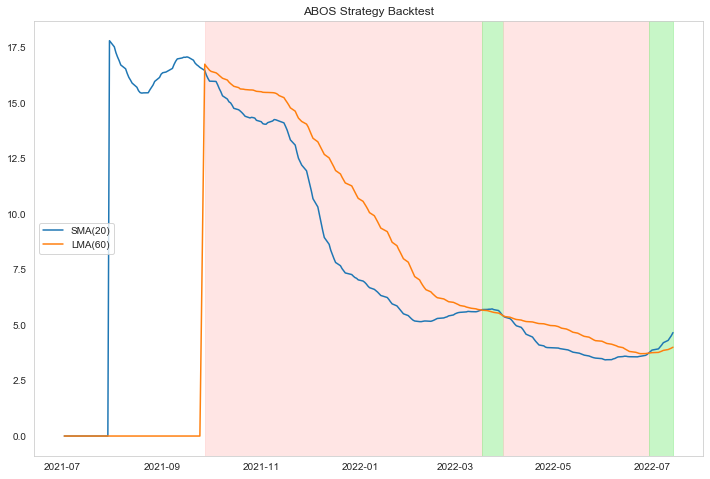

Initial Positions: 10000.0
Final Positions: 14444.18
Countervalue (increase/decrease %): 14444.18 (44.4418%)  
Commissions (CUR): 0.0  Slippage: 0.0


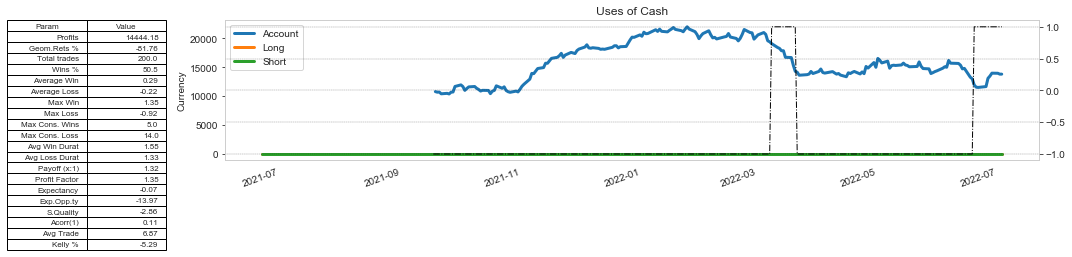

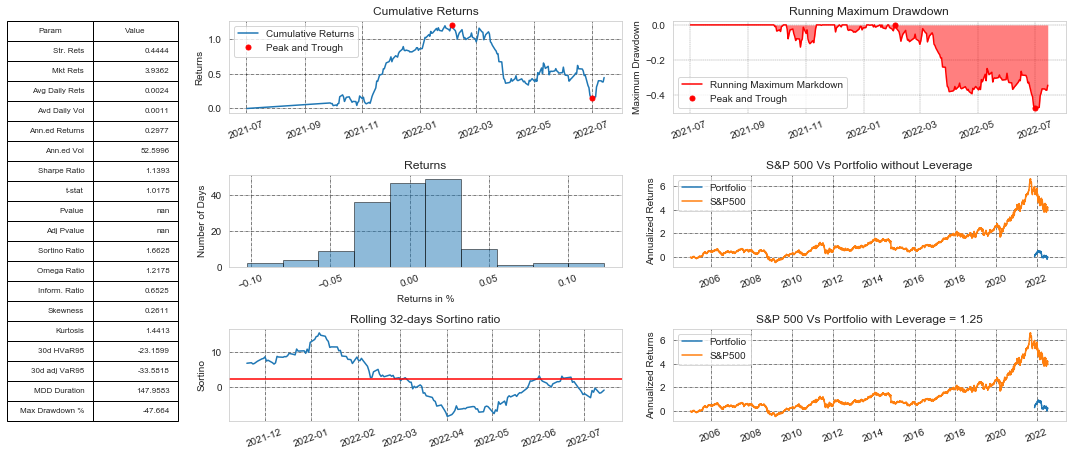

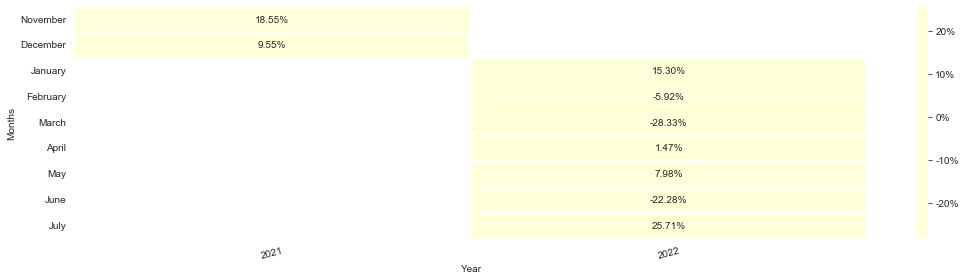

FF-5 Performance Attribution
coefficient of determination: 0.74
str_excess =  -0.0685  +  1.4246 mkt_excess +  0.3893 SMB +  3.212 HML +  6.21 RMW +  -2.0907 CMA


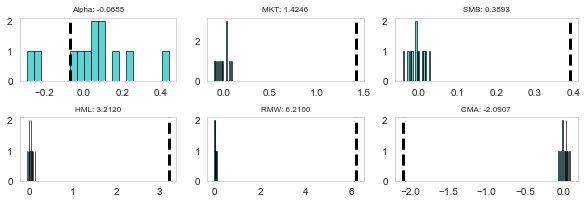

sec  wl      perc   usd  pricei  pricef  commpi  commpf  slipi  slipf  \
0    ABOS   1 -0.076633  1.22   15.92   14.70     0.0     0.0    0.0    0.0   
1    ABOS   0  0.010204 -0.15   14.70   14.85     0.0     0.0    0.0    0.0   
2    ABOS   1 -0.002020  0.03   14.85   14.82     0.0     0.0    0.0    0.0   
3    ABOS   0  0.030364 -0.45   14.82   15.27     0.0     0.0    0.0    0.0   
4    ABOS   1 -0.007859  0.12   15.27   15.15     0.0     0.0    0.0    0.0   
..    ...  ..       ...   ...     ...     ...     ...     ...    ...    ...   
195  ABOS   1  0.050877  0.29    5.70    5.99     0.0     0.0    0.0    0.0   
196  ABOS   0 -0.001669 -0.01    5.99    5.98     0.0     0.0    0.0    0.0   
197  ABOS   0 -0.015050 -0.09    5.98    5.89     0.0     0.0    0.0    0.0   
198  ABOS   0  0.000000  0.00    5.89    5.89     0.0     0.0    0.0    0.0   
199  ABOS   1  0.064516  0.38    5.89    6.27     0.0     0.0    0.0    0.0   

     side                    tstart                      tend  QtyI  QtyF  \
0    -1.0 2021-09-27 00:00:00-04:00 2021-09-28 00:00:00-04:00   1.0   1.0   
1    -1.0 2021-09-28 00:00:00-04:00 2021-09-29 00:00:00-04:00   1.0   1.0   
2    -1.0 2021-09-29 00:00:00-04:00 2021-09-30 00:00:00-04:00   1.0   1.0   
3    -1.0 2021-09-30 00:00:00-04:00 2021-10-01 00:00:00-04:00   1.0   1.0   
4    -1.0 2021-10-01 00:00:00-04:00 2021-10-04 00:00:00-04:00   1.0   1.0   
..    ...                       ...                       ...   ...   ...   
195   1.0 2022-07-07 00:00:00-04:00 2022-07-08 00:00:00-04:00   1.0   1.0   
196   1.0 2022-07-08 00:00:00-04:00 2022-07-11 00:00:00-04:00   1.0   1.0   
197   1.0 2022-07-11 00:00:00-04:00 2022-07-12 00:00:00-04:00   1.0   1.0   
198   1.0 2022-07-12 00:00:00-04:00 2022-07-13 00:00:00-04:00   1.0   1.0   
199   1.0 2022-07-13 00:00:00-04:00 2022-07-14 00:00:00-04:00   1.0   1.0   

     duration  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         3.0  
..        ...  
195       1.0  
196       3.0  
197       1.0  
198       1.0  
199       1.0  

[200 rows x 16 columns]

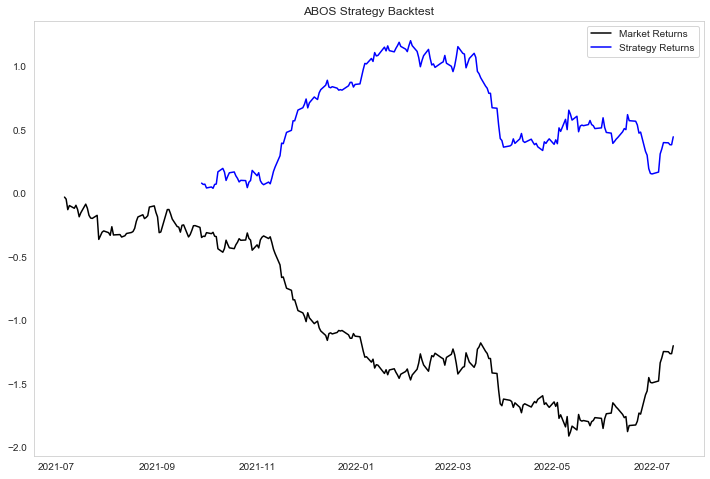

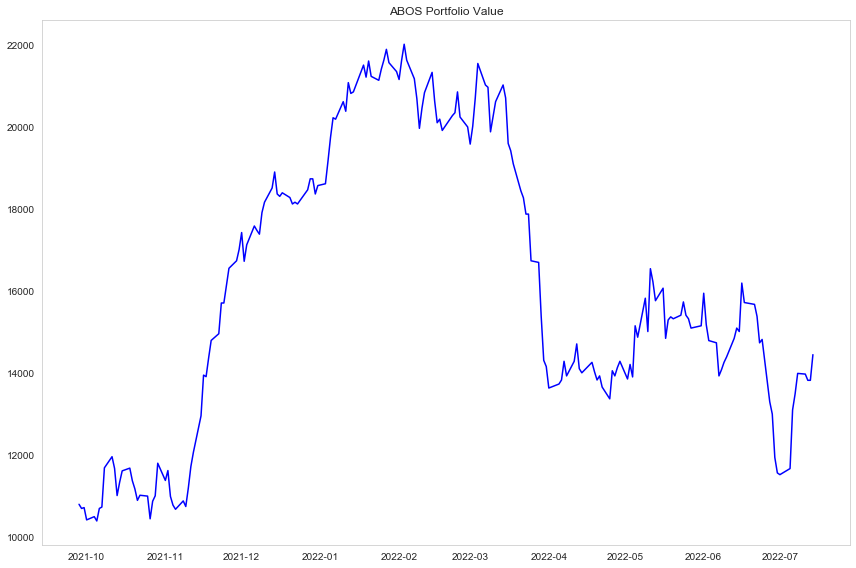

Optimal solution: 24, 50,


In [3]:
ret=s.SMACrossoverVT.testStrategy(stock='ABOS', download=False,fname='./data/scan') 
ret

### Implementation Details

In [4]:
hdata,stocks = scr.prepareData(assets='stock', startd='2021-04-10', endd='2022-09-15', freq='D', 
                                       bck1='./data/scan', download=False, first=0, show=True, provider='kibot',indext='SPY')

Asset prices shape (4413, 6)


Open   High     Low   Close  Adjusted_close  \
Date                                                                      
2022-07-13 00:00:00-04:00  117.8  119.7  116.86  118.46          118.46   
2022-07-14 00:00:00-04:00  117.8  117.8  113.02  116.00          116.00   

                              Volume  
Date                                  
2022-07-13 00:00:00-04:00  1084245.0  
2022-07-14 00:00:00-04:00  1148625.0

In [5]:
#Prepare data
def setupData(data={},algo_params={}):
    #Arguments in params are optimizable
    w1=algo_params['emaFast']
    w2=algo_params['emaMid']
    w3=algo_params['emaSlow']
    if algo_params['MAt']:
        df3=signalsfarm.getSMA(data.copy(),'Close',w1,'emaFast').fillna(0)
        df4=signalsfarm.getSMA(df3,'Close',w2,'emaMid').fillna(0)
        df5=signalsfarm.getSMA(df4,'Close',w3,'emaSlow').fillna(0)
    else:
        df3=signalsfarm.getEMA(data.copy(),'Close',w1,'emaFast').fillna(0)
        df4=signalsfarm.getEMA(df3,'Close',w2,'emaMid').fillna(0) 
        df5=signalsfarm.getEMA(df4,'Close',w3,'emaSlow').fillna(0) 
    df5['_lag1_emaFast'] = df5.emaFast.shift(1)
    df5['_lag1_emaMid'] = df5.emaMid.shift(1)
    df5['_lag1_emaSlow'] = df5.emaSlow.shift(1)
    return df5


In [6]:
def logic(self,x,hdata,algo_params):
    ## self.buffer -> x
    ## template for creating signal:   
    #buy_mask = (x.SMA > x.LMA) & (x._lag1_SMA < x._lag1_LMA)
    #sell_mask = (x.SMA < x.LMA) & (x._lag1_SMA > x._lag1_LMA)

    # Well established uptrend/downtrend
    #buy_mask = (x.emaFast > x.emaSlow) & (x._lag1_emaMid < x._lag1_emaSlow)
    #sell_mask = (x.emaFast < x.emaSlow) & (x._lag1_emaMid > x._lag1_emaSlow)
    
    # Mid
    #buy_mask = (x.emaFast > x.emaSlow) & (x._lag1_emaFast < x._lag1_emaSlow)
    #sell_mask = (x.emaFast < x.emaSlow) & (x._lag1_emaFast > x._lag1_emaSlow)
    
    # Early stage
    buy_mask = (x.emaFast > x.emaMid) & (x._lag1_emaFast < x._lag1_emaMid)
    sell_mask = (x.emaFast < x.emaMid) & (x._lag1_emaFast > x._lag1_emaMid)
    
    
    x['Traded'] = np.nan
    x.loc[buy_mask,'Traded'] = +1
    x.loc[sell_mask,'Traded'] = -1
    x['Position']=x['Traded']
    x.Traded = x.Traded.fillna(method="ffill")
    
    return x

### Filter Issues before Applying Strategy

In [7]:
data_params={'MAt':'exponential','emaFast':20,'emaMid':65,'emaSlow':130,'params':['emaFast','emaMid','emaSlow'],'signals':logic,'data':setupData,'allocation':10000}
algo_params={'Type':'KELLY','MSFT':{'KELLY':0.13,'CURR':2500,'FRAC':0.1,'STYPE':'STK'}}
#res=scr.nstocksAnalysis(stocks,hdata,setupData,logic,data_params,algo_params)
#res.mask(res.eq(0).all(axis=1)).dropna(axis=1).T.sort_values('HitRatio',ascending=False).T#stocks=list(res.mask(res.eq(0).all(axis=1)).dropna(axis=1).columns)
screen_params={'perc':0.07,'h_periods':60,'h_last':20,'vol_tr':10**7,'min_tmonths':10,'min_max_overtime':200,
               'weights':[1,1,1,1],'lbl':'Close', 'lbl2':'Volume','treshold':2}
filt=scr.nstocksSelector(stocks,hdata,setupData,logic,data_params,algo_params,screen_params)
pd.to_pickle(filt,'etf_analysis2.pkl')

In [8]:
filt.T.sort_values('SharpeRatio',ascending=False).T

ABOS                       ABSI  \
CAGR                                  0.916534                   0.805704   
SharpeRatio                           1.573506                   1.093890   
MaxDrawdown                           0.240168                   0.457159   
TotalTrades                           4.000000                   5.000000   
TotalWins                             2.000000                   4.000000   
TotalLosses                           2.000000                   1.000000   
HitRatio                              0.500000                   0.800000   
AvgWinRet                             0.654300                   0.252000   
AvgLossRet                           -0.174000                  -0.226400   
WinByLossRet                          3.760000                   1.110000   
StdRets                               0.550200                   0.374500   
NormHitRatio                          0.789900                   0.816600   
OptimalTradeSize                      0.367000                   0.619800   
Peaks returns                         0.036641                   0.044271   
Peaks duration                 1 days 13:36:30  1 days 09:05:19.354838709   
Peaks consistency                     0.465385                   0.508130   
Valleys returns                      -0.039631                  -0.058392   
Valleys duration     1 days 08:13:52.835820895  1 days 12:30:45.378151260   
Valleys consistency                   0.515385                   0.483740   
Number of Highs                             13                          4   
Trade Round Numbers                      False                      False   
Dollar Volume                           589445                    1440825   

                                          ABNB                       AAOI  \
CAGR                                  0.340361                   0.204434   
SharpeRatio                           0.850856                   0.706758   
MaxDrawdown                           0.343017                   1.140229   
TotalTrades                           5.000000                  27.000000   
TotalWins                             3.000000                  10.000000   
TotalLosses                           2.000000                  17.000000   
HitRatio                              0.600000                   0.370400   
AvgWinRet                             0.280300                   0.669800   
AvgLossRet                           -0.124300                  -0.150700   
WinByLossRet                          2.260000                   4.440000   
StdRets                               0.281400                   0.544000   
NormHitRatio                          0.771800                   0.723300   
OptimalTradeSize                      0.423000                   0.228600   
Peaks returns                         0.028944                   0.031476   
Peaks duration       1 days 10:59:22.105263157  1 days 11:03:47.932960893   
Peaks consistency                     0.476190                   0.485095   
Valleys returns                      -0.027357                  -0.030487   
Valleys duration     1 days 10:52:58.536585365  1 days 10:40:02.181818181   
Valleys consistency                   0.516291                   0.497290   
Number of Highs                              4                          7   
Trade Round Numbers                       True                      False   
Dollar Volume                        727858763                     477483   

                                          ACCD                          A  \
CAGR                                  0.441771                   0.076149   
SharpeRatio                           0.672169                   0.477466   
MaxDrawdown                           0.684740                   0.416977   
TotalTrades                           8.000000                  75.000000   
TotalWins                             3.000000                  34.000000   
TotalLosses                         

### Optimization of Strategy Parameters

In [9]:
param1_range=list(range(15,27,3))
param2_range=list(range(60,70,5))
param3_range=list(range(150,170,5))

scr.nstocksOptimizer(stocks,hdata,setupData,logic,range_idx=param1_range, ranges=[param2_range,param3_range],
                     metrics=['NHR','MDD','Sharpe'],str_params=data_params,algo_params=algo_params)


A (15, 60, 150)  AA (15, 60, 160)  AAL (24, 60, 160)  \
NHR            0.618800          5.231093           0.574200   
MDD            0.667676          0.869600           0.979530   
Sharpe         0.236670          0.431200           0.120552   

        AAN (18, 60, 160)  AAOI (21, 60, 155)  AAPL (15, 60, 155)  \
NHR              0.274300            8.006776            0.499900   
MDD              3.040198            0.788300            0.783522   
Sharpe          -0.418899            0.326619           -0.000165   

        AAT (18, 60, 160)  AAWW (21, 60, 165)  AB (15, 60, 150)  \
NHR              7.153898            0.476200          8.007954   
MDD              0.659000            1.172611          0.607700   
Sharpe           0.507446           -0.041264          0.528213   

        ABC (21, 60, 165)  ...  ABMD (24, 60, 165)  ABR (15, 60, 165)  \
NHR              0.387800  ...            7.366234           0.734200   
MDD              1.335860  ...            0.561800           0.436884   
Sharpe          -0.223449  ...            1.360012           0.326826   

        ABSI (15, 60, 150)  ABTX (18, 60, 160)  AC (21, 60, 155)  \
NHR                    NaN            0.656400          6.725692   
MDD               1.000000            0.273319          0.093000   
Sharpe            0.182866            0.191812          1.653792   

        ACA (24, 60, 165)  ACAD (15, 60, 150)  ACC (24, 60, 165)  \
NHR              0.477700            8.006776           0.645500   
MDD              0.556805            0.601400           0.679881   
Sharpe          -0.034529            0.510004           0.178912   

        ACCD (15, 60, 165)  ACET (15, 60, 160)  
NHR               8.006776            0.688600  
MDD               0.817400            0.680851  
Sharpe            0.348765            0.305663  

[3 rows x 24 columns]

In [10]:
#for s in stocks:
#    print(s)
#    scr.helper_nstocksOptimizer(s,hdata,param1_range,[param2_range,param3_range],
#                            ['NHR','MDD','Sharpe'],data_params,algo_params)   

### Selected stock analysis

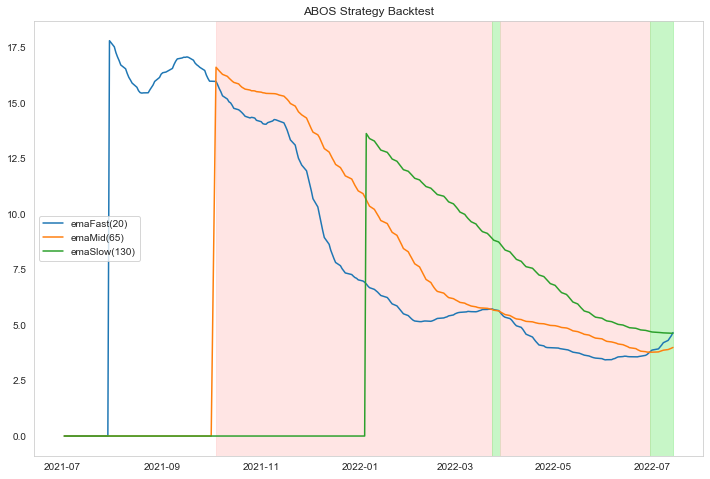

In [11]:
hdata['ABOS']['0']['Date']=hdata['ABOS']['0'].index.date
hdata['ABOS']['0']['Date']=pd.to_datetime(hdata['ABOS']['0']['Date'])
hdata['ABOS']['0'][['Date','Open', 'High', 'Low', 'Close', 'Adjusted_close', 'Volume']]

ema_strategy=scr.vecTrader(hdata['ABOS']['0'], data_params,algo_params,'ABOS')
ema_strategy.run()
ema_strategy.chartSignals(['Date'],['emaFast','emaMid','emaSlow'],[data_params['emaFast'],data_params['emaMid'],data_params['emaSlow']])


### Selected Stock Performance Analysis

Initial Positions: 10000.0
Final Positions: 19605.53
Countervalue (increase/decrease %): 19605.53 (96.0553%)  
Commissions (CUR): 0.0  Slippage: 0.0


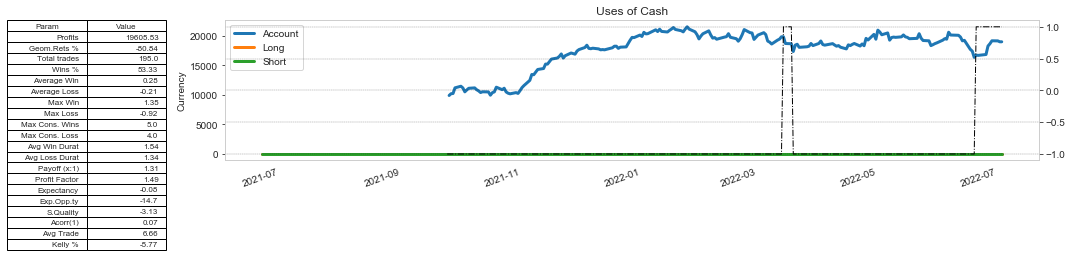

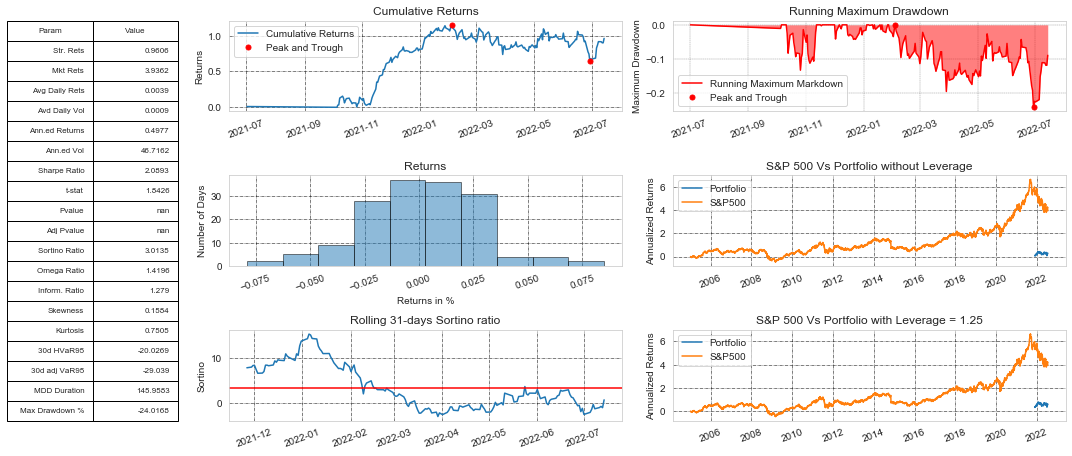

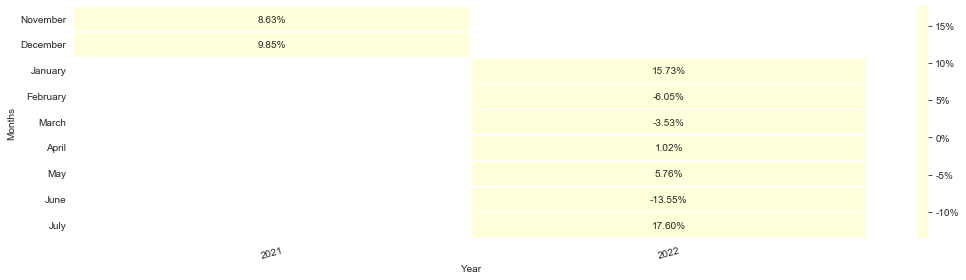

sec  wl      perc   usd  pricei  pricef  commpi  commpf  slipi  slipf  \
0  ABOS   0  0.010561 -0.16   15.15   15.31     0.0     0.0    0.0    0.0   
1  ABOS   1 -0.030046  0.46   15.31   14.85     0.0     0.0    0.0    0.0   
2  ABOS   1 -0.003367  0.05   14.85   14.80     0.0     0.0    0.0    0.0   
3  ABOS   1 -0.091216  1.35   14.80   13.45     0.0     0.0    0.0    0.0   
4  ABOS   1 -0.026766  0.36   13.45   13.09     0.0     0.0    0.0    0.0   
5  ABOS   0  0.029030 -0.38   13.09   13.47     0.0     0.0    0.0    0.0   
6  ABOS   0  0.068300 -0.92   13.47   14.39     0.0     0.0    0.0    0.0   
7  ABOS   1 -0.031967  0.46   14.39   13.93     0.0     0.0    0.0    0.0   
8  ABOS   1 -0.027279  0.38   13.93   13.55     0.0     0.0    0.0    0.0   
9  ABOS   1 -0.006642  0.09   13.55   13.46     0.0     0.0    0.0    0.0   

   side                    tstart                      tend  QtyI  QtyF  \
0  -1.0 2021-10-04 00:00:00-04:00 2021-10-05 00:00:00-04:00   1.0   1.0   
1  -1.0 2021-10-05 00:00:00-04:00 2021-10-06 00:00:00-04:00   1.0   1.0   
2  -1.0 2021-10-06 00:00:00-04:00 2021-10-07 00:00:00-04:00   1.0   1.0   
3  -1.0 2021-10-07 00:00:00-04:00 2021-10-08 00:00:00-04:00   1.0   1.0   
4  -1.0 2021-10-08 00:00:00-04:00 2021-10-11 00:00:00-04:00   1.0   1.0   
5  -1.0 2021-10-11 00:00:00-04:00 2021-10-12 00:00:00-04:00   1.0   1.0   
6  -1.0 2021-10-12 00:00:00-04:00 2021-10-13 00:00:00-04:00   1.0   1.0   
7  -1.0 2021-10-13 00:00:00-04:00 2021-10-14 00:00:00-04:00   1.0   1.0   
8  -1.0 2021-10-14 00:00:00-04:00 2021-10-15 00:00:00-04:00   1.0   1.0   
9  -1.0 2021-10-15 00:00:00-04:00 2021-10-18 00:00:00-04:00   1.0   1.0   

   duration  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       3.0  
5       1.0  
6       1.0  
7       1.0  
8       1.0  
9       3.0

In [22]:
r,s=ema_strategy.printSnapshot(type='all-pa')
ema_strategy.trades.head(10)

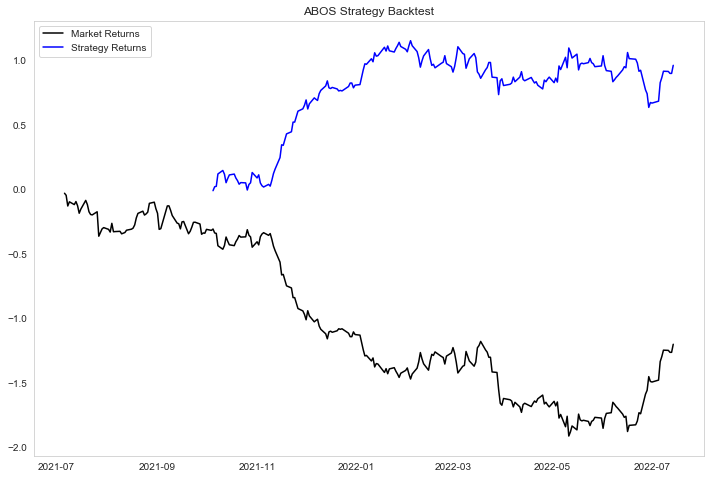

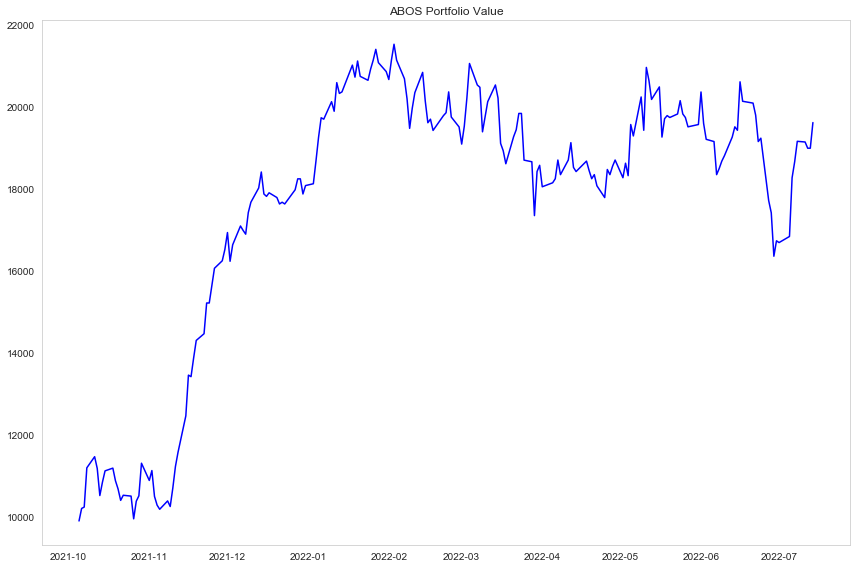

In [13]:
ema_strategy.plot_performance()

In [14]:
ema_strategy.yearly_df

In [15]:
param1_range=list(range(15,27,3))
param2_range=list(range(50,80,5))
param3_range=list(range(130,180,5))
ret = scr.vecTrader.Performance_matrix(hdata['ABOS']['0'], range_idx=param1_range, ranges=[param2_range,param3_range],
                             metrics = ['CAGR','MDD','Sharpe'], 
                             str_params=data_params,
                             algo_params=algo_params,
                             optimal_sol = True, tables=True)


Optimal solution: 15, 50, 130
